In [1]:
#importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
## Read data from an Excel file
data = pd.read_excel("/content/customer_churn_large_dataset (1).xlsx")
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [6]:
# Check for missing values
data.isnull().sum()


CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
# Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [8]:
# Get information about the no.of rows and no. of columns
data.shape


(100000, 9)

In [9]:
# Remove the "CustomerID" column
data = data.drop("CustomerID", axis=1)

In [10]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Location'] = label_encoder.fit_transform(data['Location'])

In [11]:
data.columns

Index(['Name', 'Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

In [12]:
## Display basic statistics of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,44.027020,15.280283,18.0,31.00,44.00,57.00,70.0
Gender,100000.0,0.497840,0.499998,0.0,0.00,0.00,1.00,1.0
Location,100000.0,1.995840,1.411638,0.0,1.00,2.00,3.00,4.0
Subscription_Length_Months,100000.0,12.490100,6.926461,1.0,6.00,12.00,19.00,24.0
Monthly_Bill,100000.0,65.053197,20.230696,30.0,47.54,65.01,82.64,100.0
Total_Usage_GB,100000.0,274.393650,130.463063,50.0,161.00,274.00,387.00,500.0
Churn,100000.0,0.497790,0.499998,0.0,0.00,0.00,1.00,1.0


In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
data.dtypes

Name                           object
Age                             int64
Gender                          int64
Location                        int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

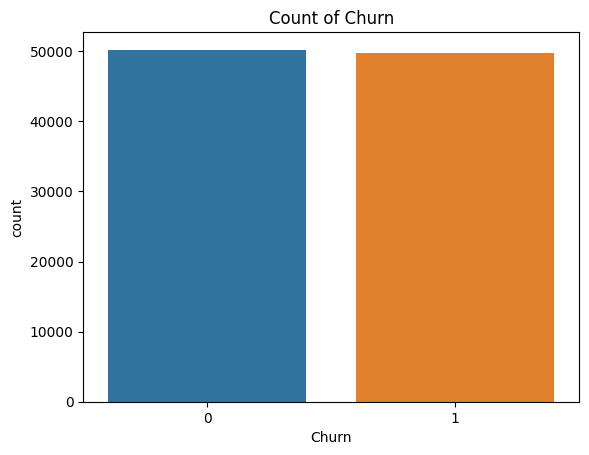

In [15]:
# plotting with target feature
sns.countplot(data=data, x='Churn')
plt.title('Count of Churn')
plt.show()

In [16]:
## Print the count of each category in the "Churn" feature
l1 = data.loc[data['Churn']== 'Yes'].count()[0]
print(f"Pecentage of Left: {l1/len(data['Churn'])}")
print(data.Churn.value_counts())

Pecentage of Left: 0.0
0    50221
1    49779
Name: Churn, dtype: int64


In [17]:
# numerical feature
numerical_feature = {feature for feature in data.columns if data[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 7
Numerical feature are:
 {'Monthly_Bill', 'Churn', 'Location', 'Subscription_Length_Months', 'Gender', 'Total_Usage_GB', 'Age'}


In [18]:
# Categorical feature
categorical_feature = {feature for feature in data.columns if data[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 1
Categorical feature are:
 {'Name'}


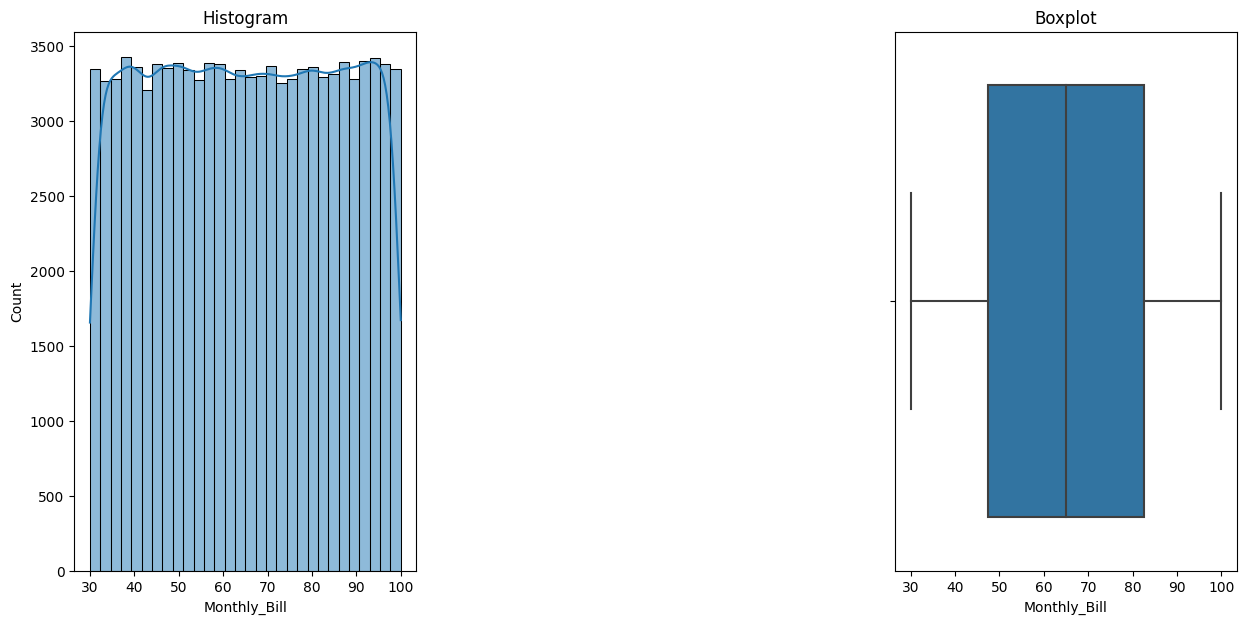

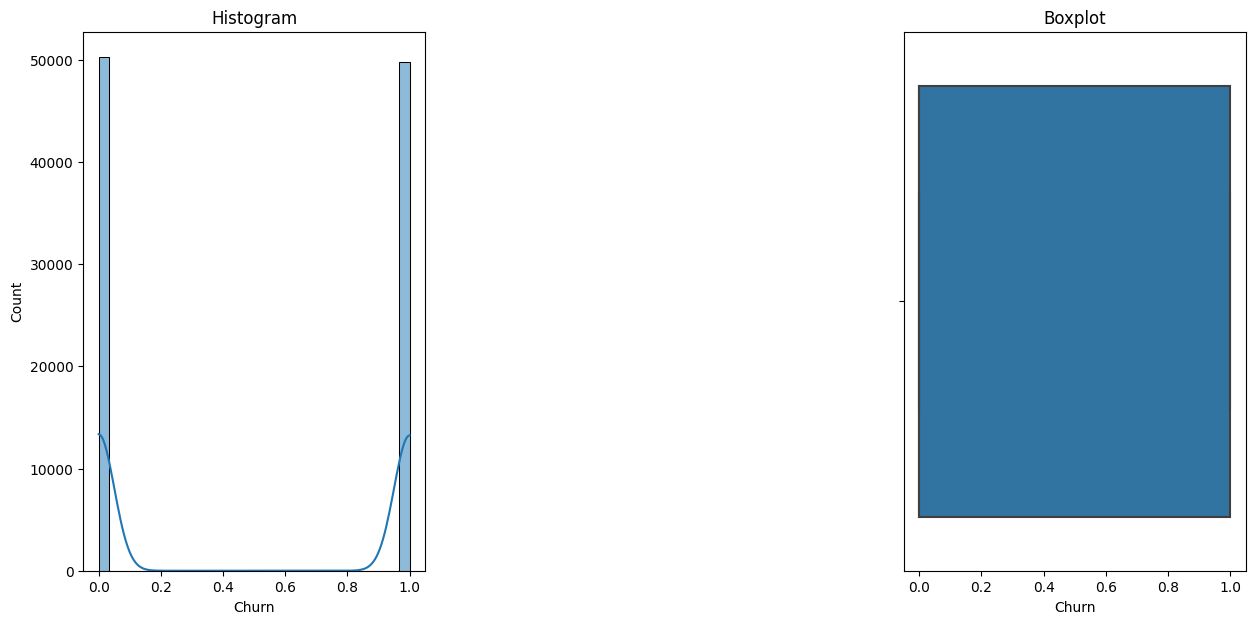

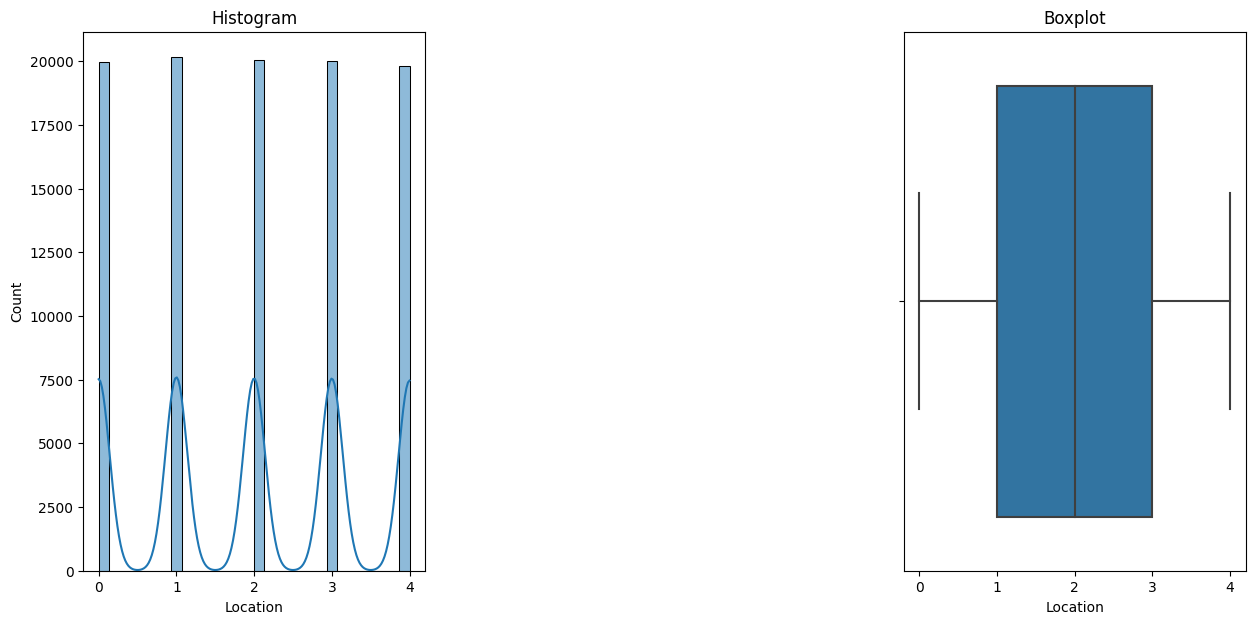

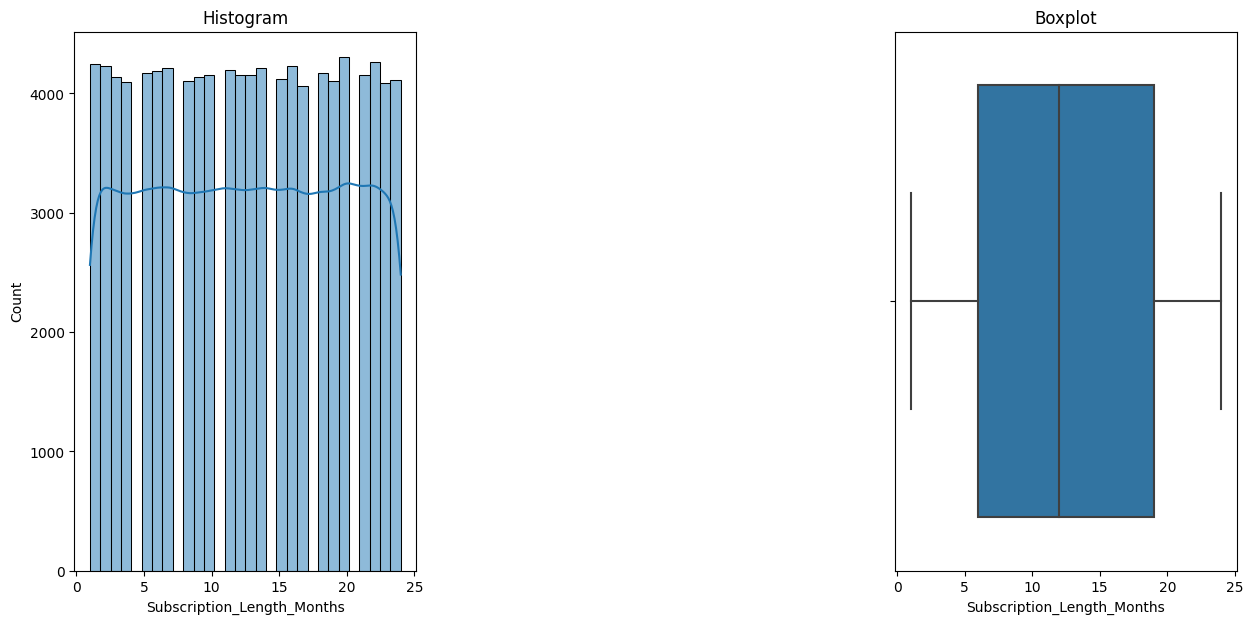

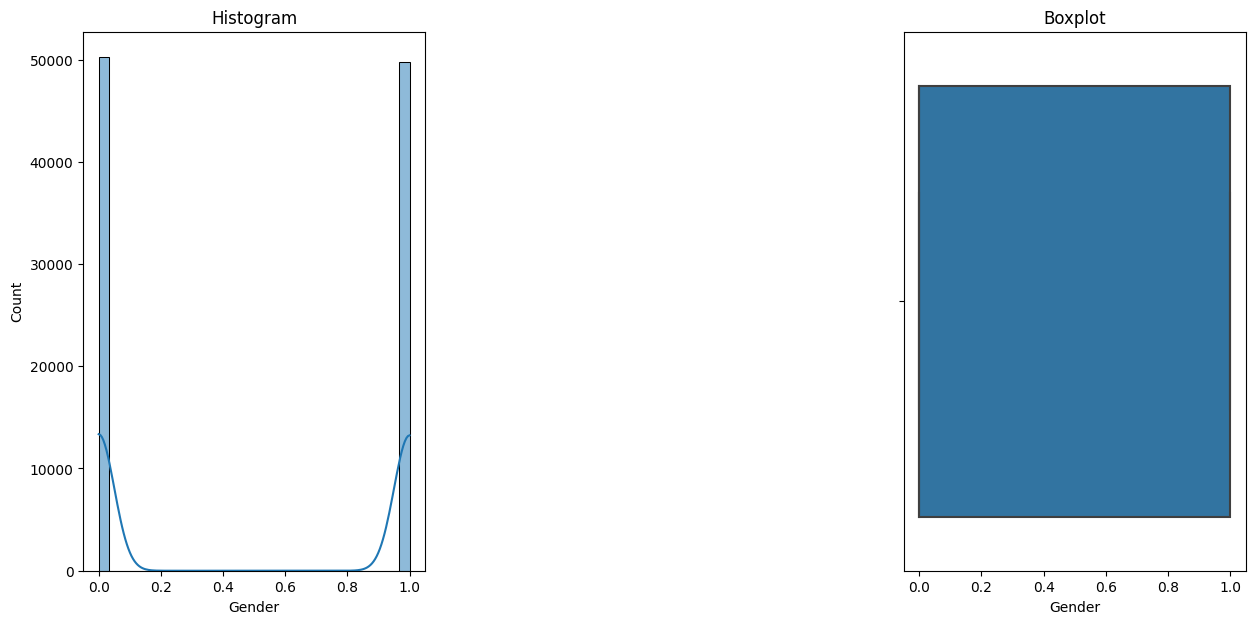

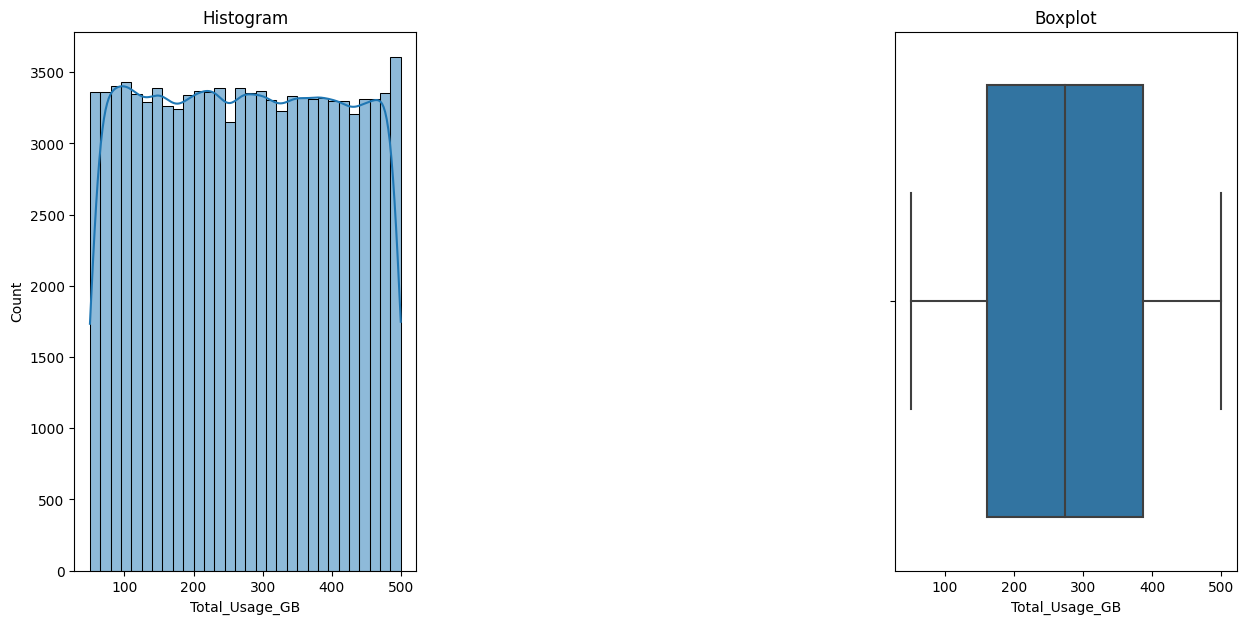

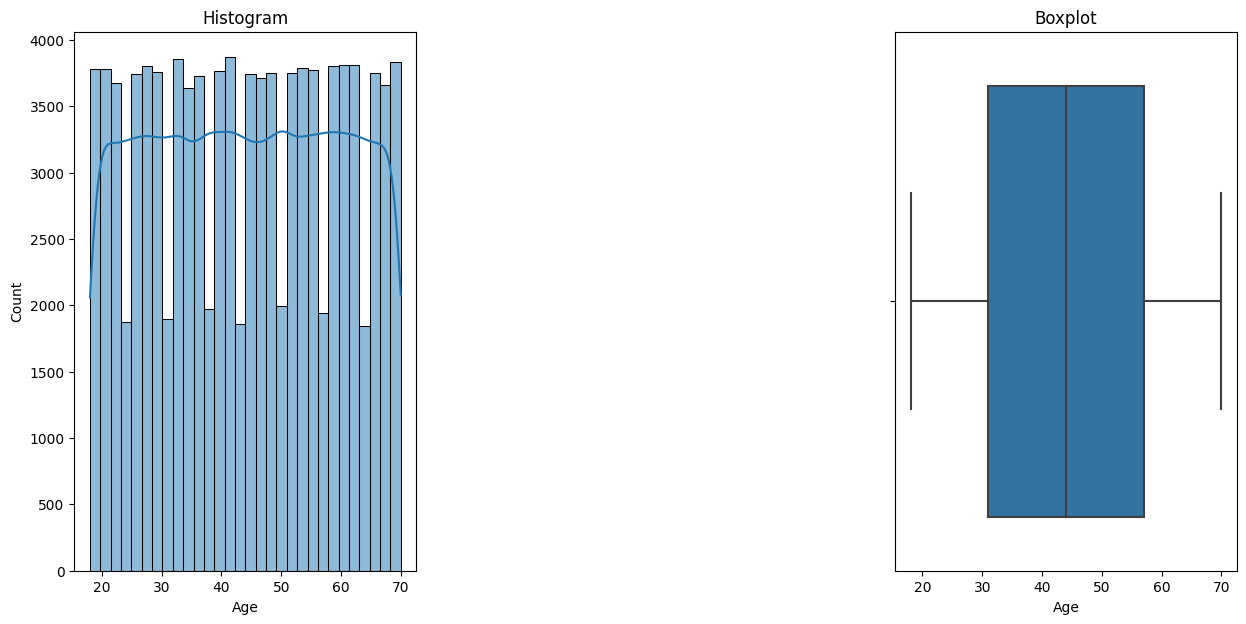

In [19]:
### Plotting numerical feature with probability distribution and checking outlier
for feature in numerical_feature:
    if feature != 'SeniorCitizen':
        plt.figure(figsize=(15,7))

        plt.subplot(1, 3, 1)
        sns.histplot(data=data, x=feature, bins=30, kde=True)
        plt.title('Histogram')

        plt.subplot(1, 3, 3)
        sns.boxplot(x=data[feature])
        plt.title('Boxplot')

plt.show()

After ploting histogram probability distribution and box plot to find numerical value are in normally distribution and our dataset has no outlier dataset.So, we don't want to remove the outlier in our dataset

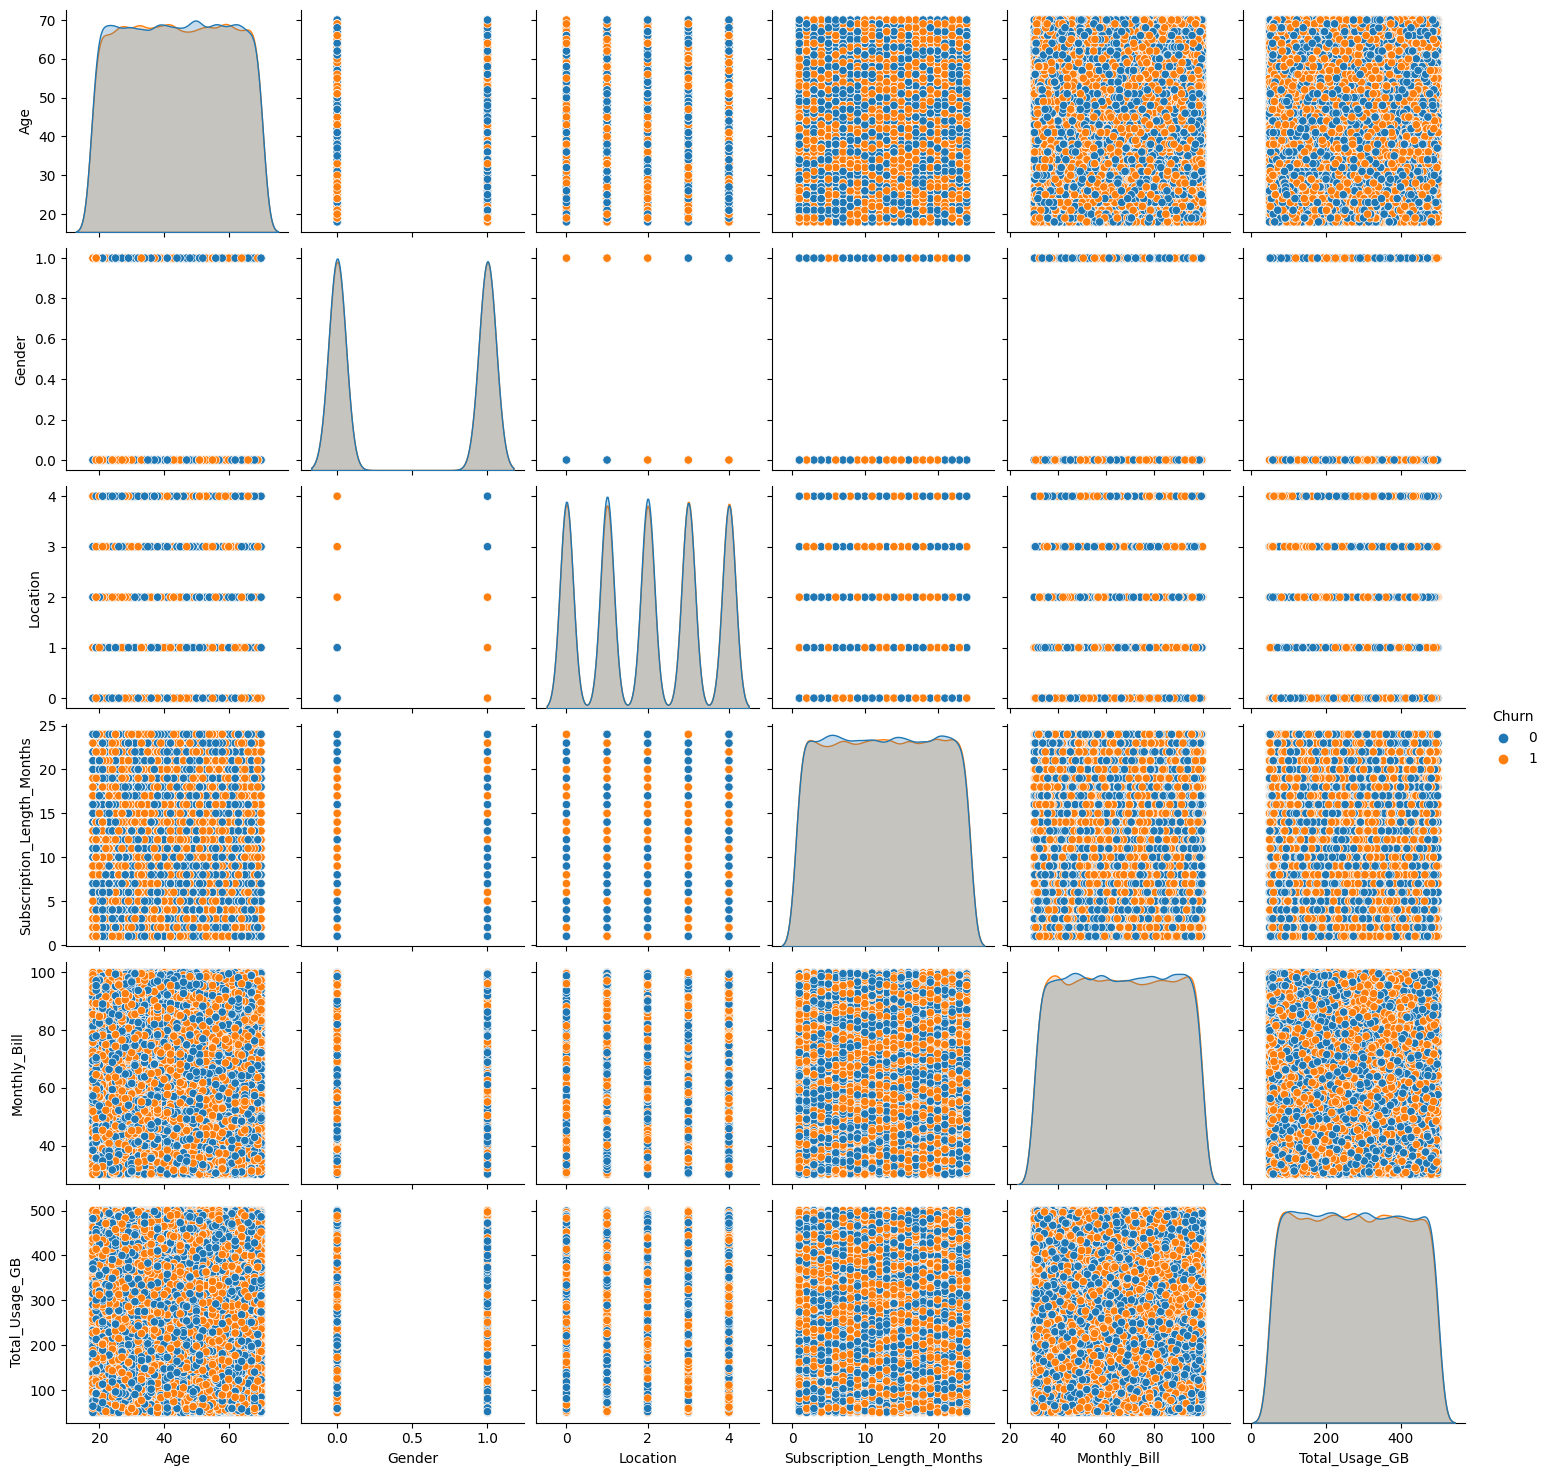

In [20]:
#Plot pairplots to visualize relationships between features
sns.pairplot(data,hue='Churn', kind='scatter')
plt.show()

In [22]:
# for i, feature in enumerate(categorical_feature):
#     if feature != 'TotalCharges':
#         if feature != 'customerID':
#             plt.figure(i)
#             plt.figure(figsize=(12,6))
#             sns.countplot(data=data, x=feature, hue='Churn')
# plt.show()

In [21]:
print(categorical_feature)


{'Name'}


In [22]:
# Encode categorical features with Label Encoding
encoder = LabelEncoder()
for feature in categorical_feature:
    data[feature] = encoder.fit_transform(data[feature])

In [23]:
data.head()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,0,63,1,2,17,73.36,236,0
1,11112,62,0,4,1,48.76,172,0
2,22223,24,0,2,5,85.47,460,0
3,33334,36,0,3,3,97.94,297,1
4,44445,46,0,3,19,58.14,266,0


In [41]:
a = data['Churn'].value_counts()
a

0    50221
1    49779
Name: Churn, dtype: int64

<Axes: >

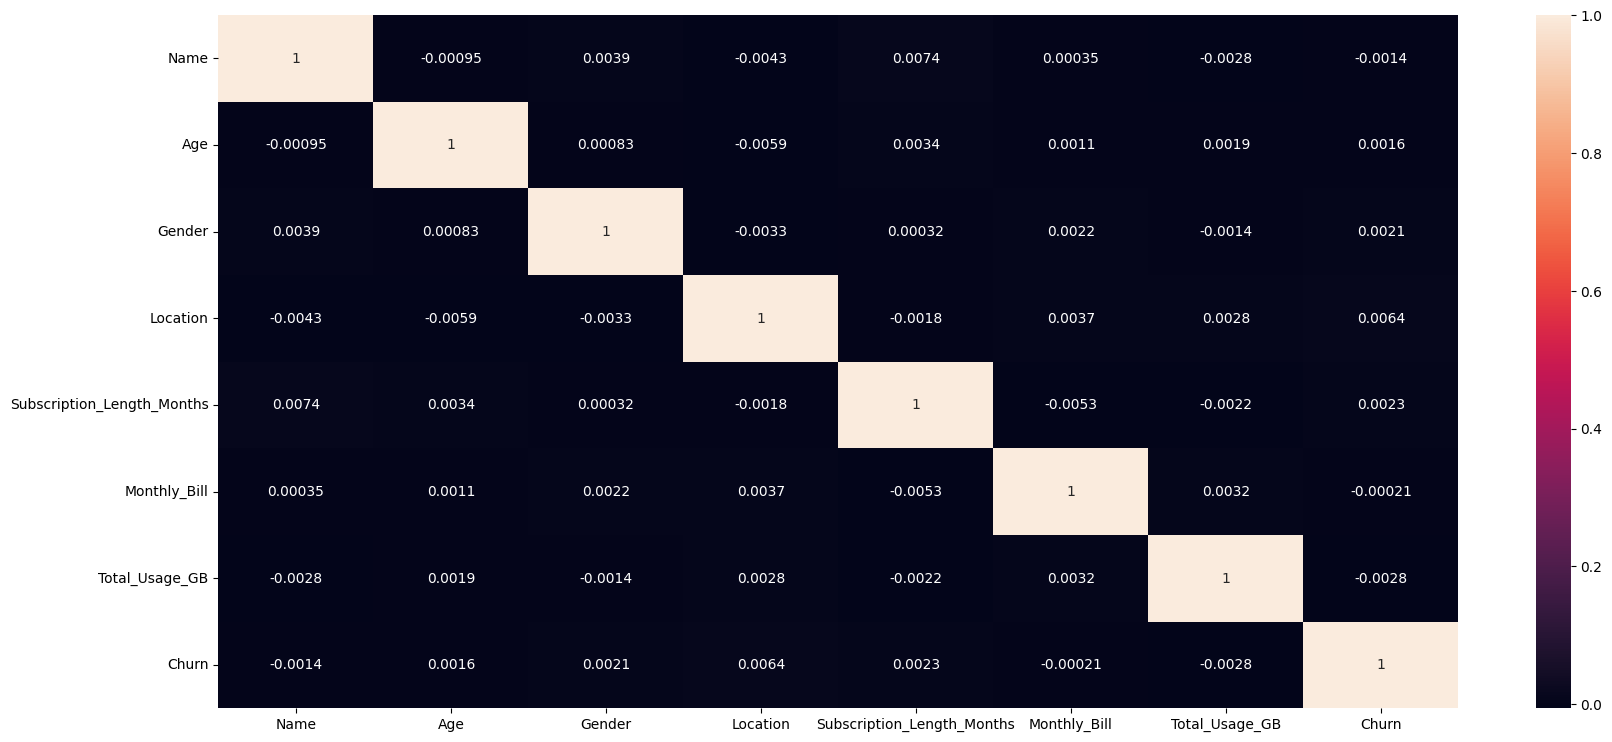

In [24]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), annot=True)

In [29]:
# splitting dataset into dependent and independent feature
X = data.drop(columns=['Churn','Name','Gender','Age','Location'])
y = data['Churn']

In [30]:
X.head()

,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,17,73.36,236
1,1,48.76,172
2,5,85.47,460
3,3,97.94,297
4,19,58.14,266


In [36]:
# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)  # Added random_state for reproducibility

In [37]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training and testing data separately
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform for testing data, not fit



In [38]:
# Random forest classifier
Rfc = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5, random_state=10)  # Added random_state for reproducibility
Rfc.fit(X_train_scaled, y_train)

rfc_pred = Rfc.predict(X_test_scaled)

# Print the results
print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.49693333333333334
Confusion matrix :
 [[4207 4312]
 [3234 3247]]
Classification report :
               precision    recall  f1-score   support

           0       0.57      0.49      0.53      8519
           1       0.43      0.50      0.46      6481

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.49     15000
weighted avg       0.51      0.50      0.50     15000



In [43]:
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression class


In [45]:
 #logistic regression
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_scaled, y_train)
Log_sampling_pred = Log_reg_sampling.predict(X_test_scaled)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test)}')

Accuracy score : 0.493
Confusion matrix :
 [[6338 6502]
 [1103 1057]]
Classification report :
               precision    recall  f1-score   support

           0       0.85      0.49      0.63     12840
           1       0.14      0.49      0.22      2160

    accuracy                           0.49     15000
   macro avg       0.50      0.49      0.42     15000
weighted avg       0.75      0.49      0.57     15000



In [46]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }

In [51]:
from sklearn.model_selection import RandomizedSearchCV  # Import RandomizedSearchCV class


In [52]:
from sklearn.ensemble import GradientBoostingClassifier  # Import GradientBoostingClassifier class


In [53]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled, y_train)
pred = gbc.predict(X_test_scaled)

print(f'Accuracy score : {accuracy_score(pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test)}')
print(f'Classification report :\n {classification_report(pred, y_test)}')

Accuracy score : 0.495
Confusion matrix :
 [[5179 5313]
 [2262 2246]]
Classification report :
               precision    recall  f1-score   support

           0       0.70      0.49      0.58     10492
           1       0.30      0.50      0.37      4508

    accuracy                           0.49     15000
   macro avg       0.50      0.50      0.47     15000
weighted avg       0.58      0.49      0.52     15000



In [54]:
gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
gbc_optm.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=3, max_leaf_nodes=8, min_samples_leaf=15, min_samples_split=7, n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=3, max_leaf_nodes=8, min_samples_leaf=15, min_samples_split=7, n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=3, max_leaf_nodes=8, min_samples_leaf=15, min_samples_split=7, n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=3, max_leaf_nodes=8, min_samples_leaf=15, min_samples_split=7, n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, learning_rate=0.2, loss=exponential, max_depth=3, max_leaf_nodes=8, min_samples_leaf=15, min_samples_split=7, n_estimators=250;, score=nan total time=   0.0s
[CV 1/5

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_leaf_nodes': [3, 6, 8, 9, 12, 15,
                                                           18, 24],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   verbose=3)

In [55]:
gbc_optm.best_estimator_


GradientBoostingClassifier(learning_rate=0.2, loss='deviance', max_depth=7,
                           max_leaf_nodes=6, min_samples_leaf=15,
                           min_samples_split=4, n_estimators=300)

In [60]:
# GradientBoostingClassifier with specified hyperparameters
gbc_tuning = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2, loss='deviance', max_depth=7,
                           max_leaf_nodes=6, min_samples_leaf=15,
                           min_samples_split=4, n_estimators=300)


In [61]:
gbc_tuning.fit(X_train_scaled, y_train)
pred = gbc_tuning.predict(X_test_scaled)

In [62]:
print(f'Accuracy score: {accuracy_score(pred, y_test)}')
print(f'Confusion matrix:\n{confusion_matrix(pred, y_test)}')
print(f'Classification report:\n{classification_report(pred, y_test)}')  # Added the missing closing parenthesis

Accuracy score: 0.4981333333333333
Confusion matrix:
[[4419 4506]
 [3022 3053]]
Classification report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54      8925
           1       0.40      0.50      0.45      6075

    accuracy                           0.50     15000
   macro avg       0.50      0.50      0.49     15000
weighted avg       0.52      0.50      0.50     15000




Interpretation of Model Results
Random Forest Classifier:
The Random Forest Classifier achieved an accuracy score of approximately 0.50, which means it correctly predicted around 50% of the outcomes in the test set.
The confusion matrix shows that there were 4,419 true negatives (customers correctly predicted as not churning) and 3,053 true positives (customers correctly predicted as churning). On the other hand, there were 4,506 false negatives and 3,022 false positives.
The precision for predicting "Churn" (class 1) is approximately 40%, meaning that among the customers predicted to churn, around 40% actually did.
The recall for predicting "Churn" is approximately 50%, indicating that the model captured about 50% of the actual churning customers.
The F1-score, which balances precision and recall, is approximately 0.45.
The weighted average F1-score is approximately 0.50.
Cross-Validation:
Cross-validation was performed using a Random Forest Classifier with 5 folds.
The mean cross-validation score is approximately 0.49, which is consistent with the accuracy score achieved by the Random Forest Classifier on the test set.
These results suggest that the Random Forest Classifier achieved a moderate level of accuracy in predicting customer churn. However, there is room for improvement in the model's performance, and further hyperparameter tuning and feature engineering may be necessary to enhance its predictive capabilities.